### Import Required libraries and Loading the data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
data = pd.read_csv('/content/ISRO1274_ConsolData.csv')
data.head()

,Year,Month,Day,Hour,air_temp,windspeed,winddir,pressure,humidity,rainfall,fog,AOD
0,2015,11,1,0,22.9,0.0,359.2,1012.2,92.7,1,128,-999.0
1,2015,11,1,1,23.4,2.0,81.6,1013.0,90.6,1,128,-999.0
2,2015,11,1,2,24.0,0.7,117.8,1013.9,86.9,1,128,-999.0
3,2015,11,1,3,24.9,1.6,125.1,1014.6,81.9,1,128,-999.0
4,2015,11,1,4,25.6,1.0,91.9,1014.7,77.3,1,128,-999.0


In [ ]:
data['Date']=pd.to_datetime(data[['Year','Month','Day','Hour']])
data.index = data['Date']
data.head()

,Year,Month,Day,Hour,air_temp,windspeed,winddir,pressure,humidity,rainfall,fog,AOD,Date
Date,,,,,,,,,,,,,
2015-11-01 00:00:00,2015,11,1,0,22.9,0.0,359.2,1012.2,92.7,1,128,-999.0,2015-11-01 00:00:00
2015-11-01 01:00:00,2015,11,1,1,23.4,2.0,81.6,1013.0,90.6,1,128,-999.0,2015-11-01 01:00:00
2015-11-01 02:00:00,2015,11,1,2,24.0,0.7,117.8,1013.9,86.9,1,128,-999.0,2015-11-01 02:00:00
2015-11-01 03:00:00,2015,11,1,3,24.9,1.6,125.1,1014.6,81.9,1,128,-999.0,2015-11-01 03:00:00
2015-11-01 04:00:00,2015,11,1,4,25.6,1.0,91.9,1014.7,77.3,1,128,-999.0,2015-11-01 04:00:00


In [ ]:
data.shape

(15407, 13)

In [ ]:
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'air_temp', 'windspeed', 'winddir',
       'pressure', 'humidity', 'rainfall', 'fog', 'AOD', 'Date'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15407 entries, 2015-11-01 00:00:00 to 2019-07-31 09:00:00
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Year       15407 non-null  int64         
 1   Month      15407 non-null  int64         
 2   Day        15407 non-null  int64         
 3   Hour       15407 non-null  int64         
 4   air_temp   15407 non-null  float64       
 5   windspeed  15407 non-null  float64       
 6   winddir    15407 non-null  float64       
 7   pressure   15407 non-null  float64       
 8   humidity   15407 non-null  float64       
 9   rainfall   15407 non-null  int64         
 10  fog        15407 non-null  int64         
 11  AOD        15407 non-null  float64       
 12  Date       15407 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(6)
memory usage: 1.6 MB


###Exploratory Data Analysis

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Customize the graphs or plots
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (30,8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
data.describe()

,Year,Month,Day,Hour,air_temp,windspeed,winddir,pressure,humidity,rainfall,fog,AOD
count,15407.000000,15407.000000,15407.00000,15407.000000,15407.000000,15407.000000,15407.000000,15407.000000,15407.000000,15407.000000,15407.000000,15407.000000
mean,2016.879925,5.572662,15.85247,11.413189,26.525268,0.726942,274.873830,1008.157935,70.158201,2.592588,58.696437,-892.039379
std,1.401161,3.671543,8.74859,6.818437,5.224534,0.842258,92.473632,6.036711,17.784803,7.609650,63.764363,308.962252
min,2015.000000,1.000000,1.00000,0.000000,-39.100000,0.000000,0.000000,925.000000,0.000000,0.000000,0.000000,-999.000000
25%,2016.000000,2.000000,8.00000,6.000000,22.900000,0.000000,176.000000,1003.700000,58.000000,1.000000,0.000000,-999.000000
50%,2016.000000,5.000000,16.00000,11.000000,27.300000,0.600000,311.300000,1009.100000,72.300000,1.000000,0.000000,-999.000000
75%,2019.000000,9.000000,23.00000,17.000000,30.100000,1.200000,359.200000,1012.900000,84.600000,1.000000,128.000000,-999.000000
max,2019.000000,12.000000,31.00000,23.000000,42.300000,9.000000,359.200000,1023.300000,99.900000,79.000000,128.000000,4.910500


In [ ]:
data['air_temp'].describe()

count    15407.000000
mean        26.525268
std          5.224534
min        -39.100000
25%         22.900000
50%         27.300000
75%         30.100000
max         42.300000
Name: air_temp, dtype: float64

In [ ]:
indexNames = data[data['air_temp'] > 50.0].index # getting index values of that maximum value elemnt

In [ ]:
data.drop(indexNames , inplace=True) #droping the rows of that outliers value

In [ ]:
indexNames = data[data['air_temp'] < -0].index # ................

In [ ]:
data.drop(indexNames , inplace=True) #...................

In [ ]:
data['air_temp'].describe()# ........ 

count    15406.000000
mean        26.529527
std          5.197879
min          1.300000
25%         22.900000
50%         27.300000
75%         30.100000
max         42.300000
Name: air_temp, dtype: float64

In [ ]:
fig = px.line(data,x='Date',y='air_temp',title='Air Temp Graph')#Initial position of air_temp.
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=20,
    ))
fig.show()

### Splitting the data

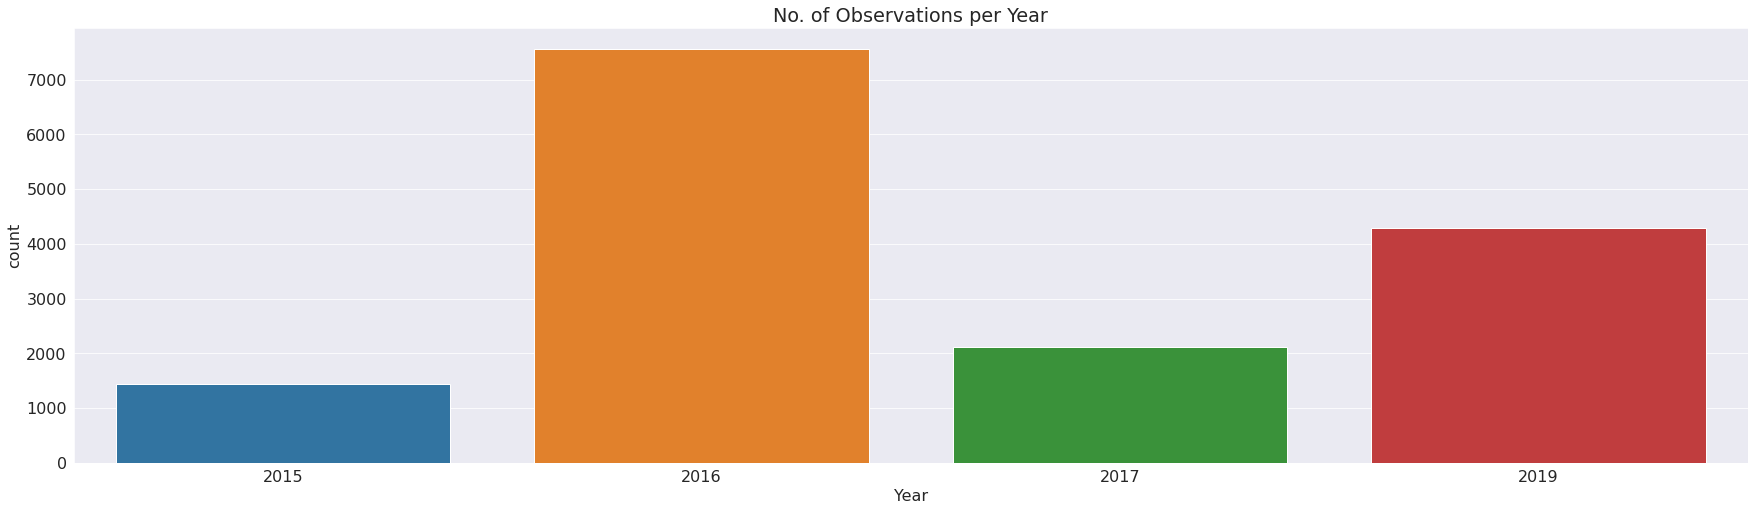

In [ ]:
plt.title('No. of Observations per Year')
sns.countplot(x = data.Year);

In [ ]:
data.drop(['fog','AOD','Year','Month','Day','Date','Hour'],axis=1,inplace=True)
data.head()

,air_temp,windspeed,winddir,pressure,humidity,rainfall
Date,,,,,,
2015-11-01 00:00:00,22.9,0.0,359.2,1012.2,92.7,1
2015-11-01 01:00:00,23.4,2.0,81.6,1013.0,90.6,1
2015-11-01 02:00:00,24.0,0.7,117.8,1013.9,86.9,1
2015-11-01 03:00:00,24.9,1.6,125.1,1014.6,81.9,1
2015-11-01 04:00:00,25.6,1.0,91.9,1014.7,77.3,1


In [ ]:
#Splitting the data into train and test according to the "Year" column.
train = data[0:int(data.shape[0]*0.8)].copy()
train.tail()

,air_temp,windspeed,winddir,pressure,humidity,rainfall
Date,,,,,,
2019-03-05 07:00:00,27.9,1.8,240.0,1005.9,77.5,1
2019-03-05 08:00:00,28.2,0.8,174.0,1005.3,71.4,1
2019-03-05 09:00:00,28.0,1.5,92.4,1004.8,69.7,1
2019-03-05 10:00:00,28.1,1.8,209.2,1004.2,67.7,1
2019-03-05 11:00:00,27.6,0.8,176.4,1004.6,64.4,1


In [ ]:
test = data[int(data.shape[0]*0.8):].copy()
test.tail()

,air_temp,windspeed,winddir,pressure,humidity,rainfall
Date,,,,,,
2019-07-30 03:00:00,26.8,2.1,241.0,1002.4,99.9,1
2019-07-30 04:00:00,28.2,0.6,218.0,1002.2,99.9,1
2019-07-30 05:00:00,28.4,0.0,359.2,1002.1,99.9,1
2019-07-30 09:00:00,27.2,0.7,215.5,1000.2,97.5,1
2019-07-31 09:00:00,30.8,1.3,241.0,997.9,73.4,1


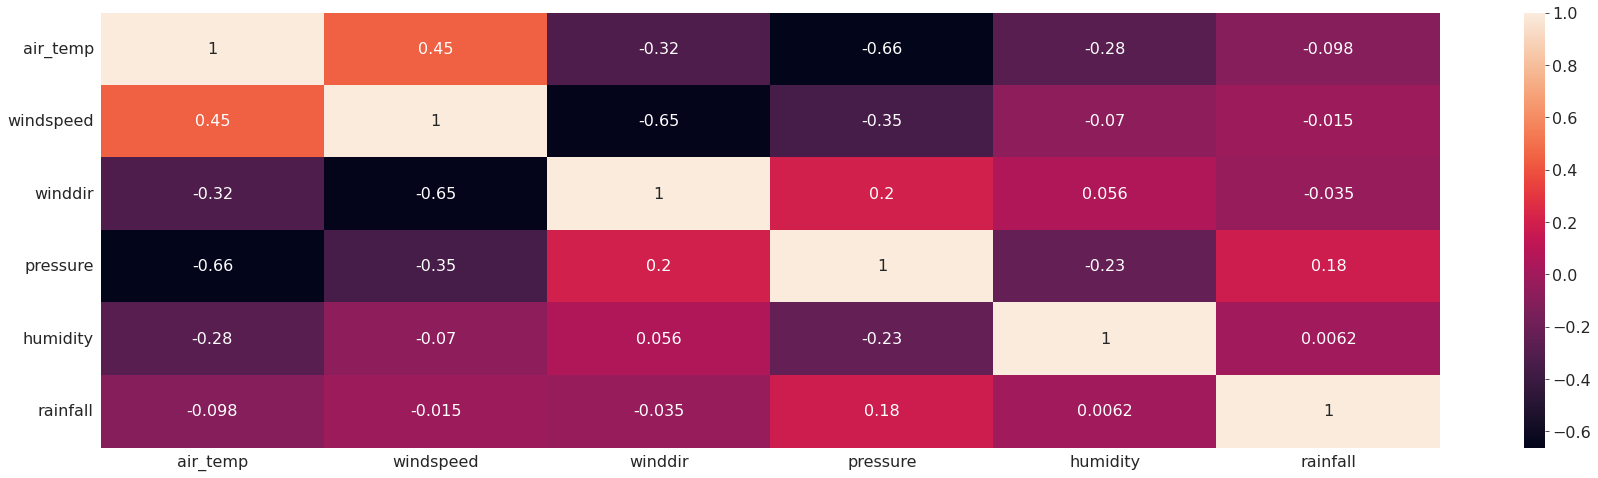

In [ ]:
ax = sns.heatmap(data.corr(), annot=True)

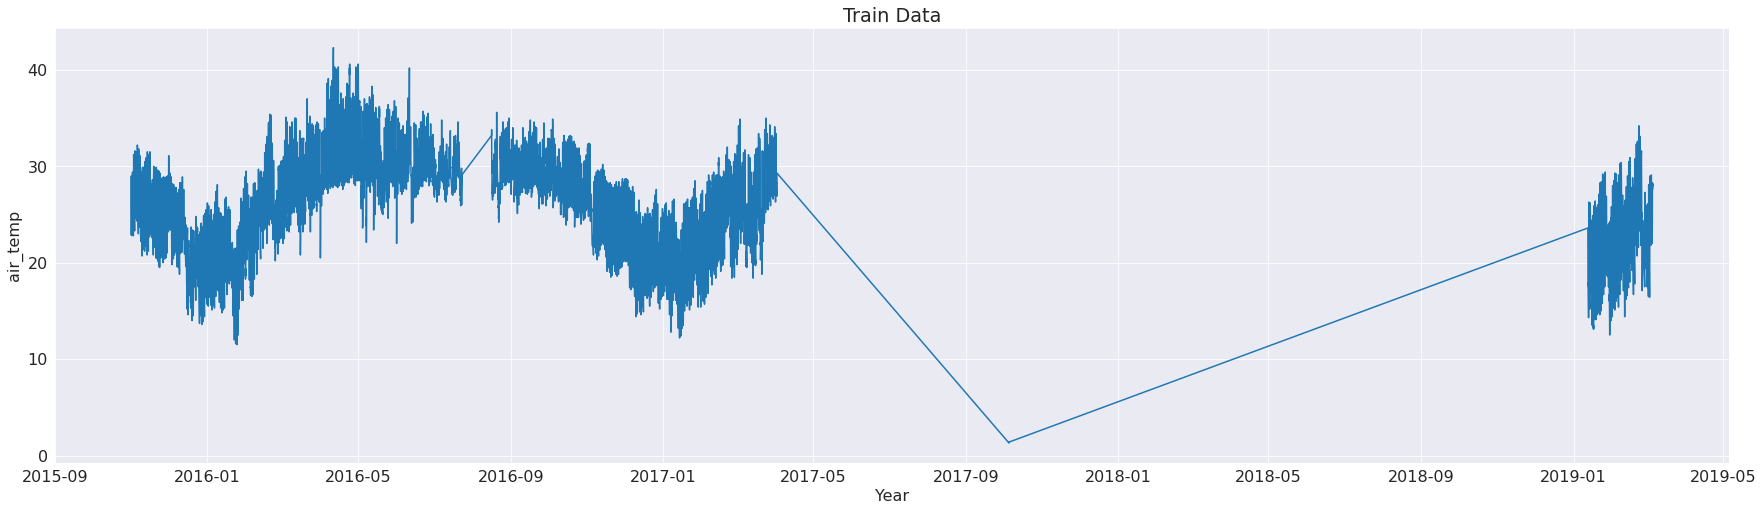

In [ ]:
plt.title('Train Data')
plt.xlabel('Year')
plt.ylabel('air_temp')
plt.plot(train['air_temp'])

###Scaling Numeric columns to range(0,1) 

- For standardizing/normalization of the input data



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = scaler.fit_transform(train)

In [ ]:
train[0]

array([0.52682927, 0.        , 1.        , 0.6908078 , 0.92258065,
       0.        ])

###Dividing Train data into time shifts  
- **_Lstm_** is good at memorizing previous data,we are provinding past data for each input in timeshifts.  
- Suppose, we want to predict todays temperature, we need to know the past data to predict. so we are using 7 days of previous days data in order to make predict.

In [ ]:
#Create two empty lists x_train and y_train
X_train = []
y_train = []

- For every target value we feed into out network, we need past 30 days data for that target value.
- We are collecting the past 7 days of target value in "**X_list**" and the target value in "**y_list**".
- so for all values it will take past 30 days values for each target value by iteration of the following loop.

In [ ]:
for i in range(7, train.shape[0]):
  X_train.append(train[i-7:i])
  y_train.append(train[i,0])

In [ ]:
#Converting Lists into numpy arrays
X_train = np.array(X_train) 
y_train =  np.array(y_train)

In [ ]:
X_train.shape, y_train.shape

((12317, 7, 6), (12317,))

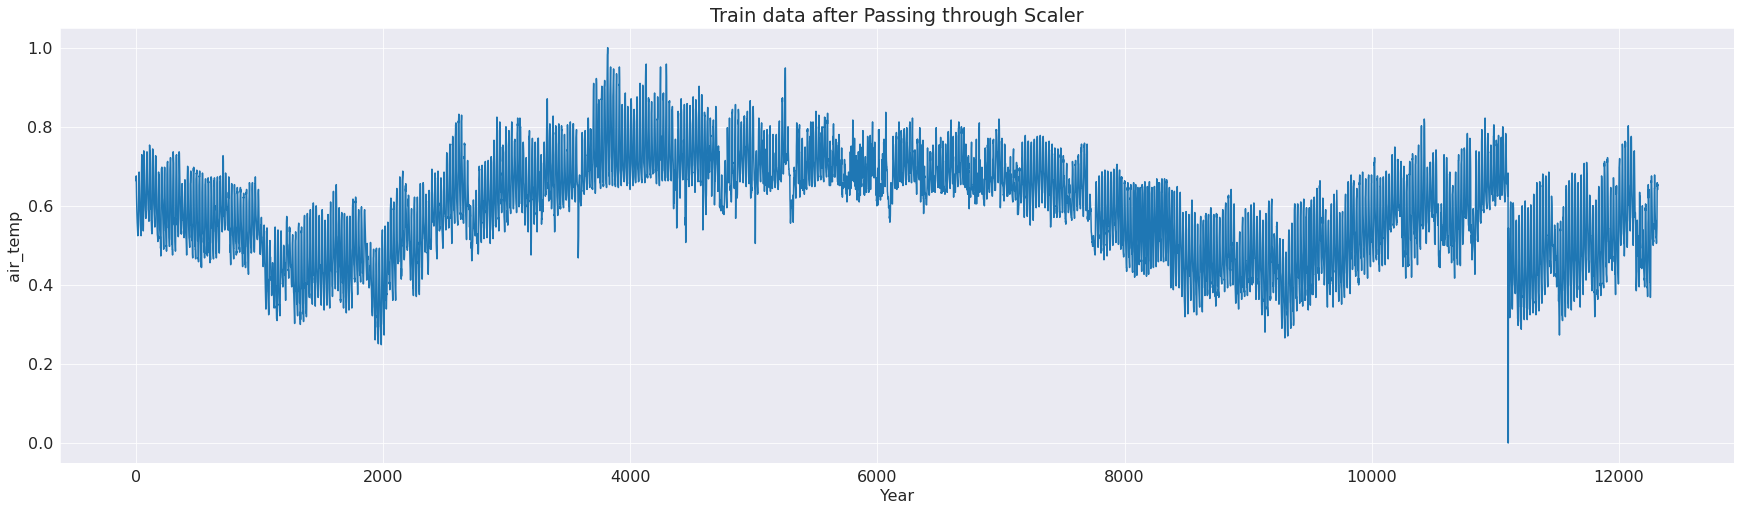

In [ ]:
plt.title('Train data after Passing through Scaler')
plt.xlabel('Year')
plt.ylabel('air_temp')
plt.plot(y_train)

###LSTM

An overview of the LSTM model life-cycle in Keras.

1. Define Network
2. Compile Network
3. Fit Network
4. Evaluate Network
5. Make Predictions

In [ ]:
#Import libraries
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

In [ ]:
# sequential() -->Time Series data are sequential data
model = Sequential()

###1.Define Network



In [ ]:
model.add(LSTM(100 , return_sequences= True , activation='relu', input_shape = (X_train.shape[1],6) , kernel_regularizer= keras.regularizers.l2(0.001))) 

model.add(Dropout(0.3)) # Add a dropout layer in order to avoid overfitting.

model.add(LSTM(200, return_sequences= True)) # Hidden layer,Another Lstm layer for stacked Lstm method.

model.add(Dropout(0.3))

model.add(LSTM(100))

# final Output layer.
model.add(Dense(1))

- **_Dense Layer:_**  The dense layer is a fully connected layer, which means all the neurons in a layer are connected to those in the next layer
- **_Dropout:_** In the dropout technique, some of the neurons in hidden or visible layers are dropped or omitted randomly. Dropout technique regularizes the neural network model to produce a robust model which does not overfit.

In [ ]:
# printing the model summary or the Architecture.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 100)            42800     
_________________________________________________________________
dropout (Dropout)            (None, 7, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 200)            240800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 404,101
Trainable params: 404,101
Non-trainable params: 0
__________________________________________________

###2.Compile Network
Compilation is an efficiency step. It transforms the simple sequence of layers that we defined into a highly efficient series of matrix transforms in a format intended to be executed on your GPU or CPU, depending on how Keras is configured.

**Loss Function:**  
some standard loss functions for different predictive model types:

1. Regression:  Mean Squared Error or ‘mean_squared_error’.
2. Binary Classification (2 class):  Logarithmic Loss, also called cross entropy or ‘binary_crossentropy‘.
3. Multiclass Classification (>2 class):  Multiclass Logarithmic Loss or ‘categorical_crossentropy‘.

**Optimizer:**  
Most commonly used optimization algorithms because of their generally better performance are:

1. Stochastic Gradient Descent -- SGD or ‘sgd‘, that requires the tuning of a learning rate and momentum.
2. Adaptive moment estimation -- ADAM, or ‘adam‘, that requires the tuning of learning rate.
3. Root Mean Squared Propagation -- RMSprop, or ‘rmsprop‘, that requires the tuning of learning rate.


**Metric for Regression models**  
Below is a list of the metrics that you can use in Keras on regression problems.

1. Mean Squared Error: mean_squared_error, MSE or 'mse'
2. Mean Absolute Error: mean_absolute_error, MAE, 'mae'
3. Mean Absolute Percentage Error: mean_absolute_percentage_error, MAPE, 'mape'
4. Cosine Proximity: cosine_proximity, 'cosine'

In [ ]:
model.compile(optimizer='adamax', loss='mse')
#model.compile(optimizer='sgd', loss='mse')
#model.compile(optimizer='adam', loss='mse')
#model.compile(optimizer='rmsprop', loss='mse')

###3. Fit Network

In [ ]:
# fitting the model with train data
history = model.fit(X_train,y_train , epochs=10 , batch_size=32)

Epoch 1/10
385/385 [==============================] - 20s 39ms/step - loss: 0.0144
Epoch 2/10
385/385 [==============================] - 15s 39ms/step - loss: 0.0057
Epoch 3/10
385/385 [==============================] - 15s 39ms/step - loss: 0.0045
Epoch 4/10
385/385 [==============================] - 15s 39ms/step - loss: 0.0039
Epoch 5/10
385/385 [==============================] - 15s 39ms/step - loss: 0.0035
Epoch 6/10
385/385 [==============================] - 15s 39ms/step - loss: 0.0031
Epoch 7/10
385/385 [==============================] - 15s 39ms/step - loss: 0.0028
Epoch 8/10
385/385 [==============================] - 15s 39ms/step - loss: 0.0025
Epoch 9/10
385/385 [==============================] - 15s 39ms/step - loss: 0.0023
Epoch 10/10
385/385 [==============================] - 15s 39ms/step - loss: 0.0022


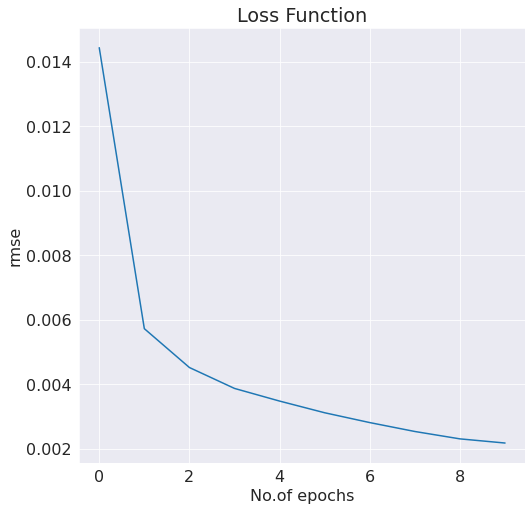

In [ ]:
# plotting the loss value of each epoch
plt.figure(figsize=(8,8))
plt.title('Loss Function')
plt.xlabel('No.of epochs')
plt.ylabel('rmse')
plt.plot(history.history['loss'])

###4. Evaluate Network

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_train, train_preds))

In [ ]:
print(round(RMSE,3))

0.036


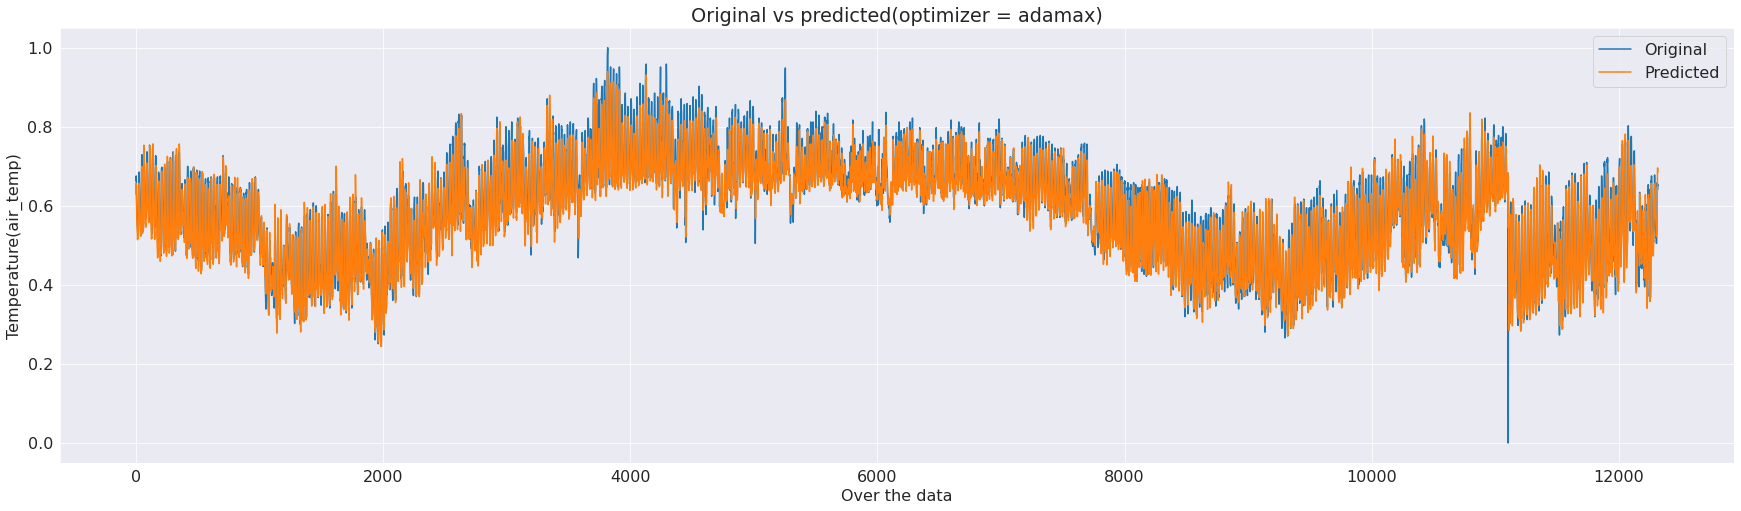

In [ ]:
# plotting the original Vs Predicted values graphically.
plt.figure(figsize=(30,8))
plt.title('Original vs predicted(optimizer = adamax)')
plt.xlabel('Over the data')
plt.ylabel('Temperature(air_temp)')
plt.plot(y_train)
plt.plot(train_preds)
plt.legend(['Original','Predicted'])
plt.show()

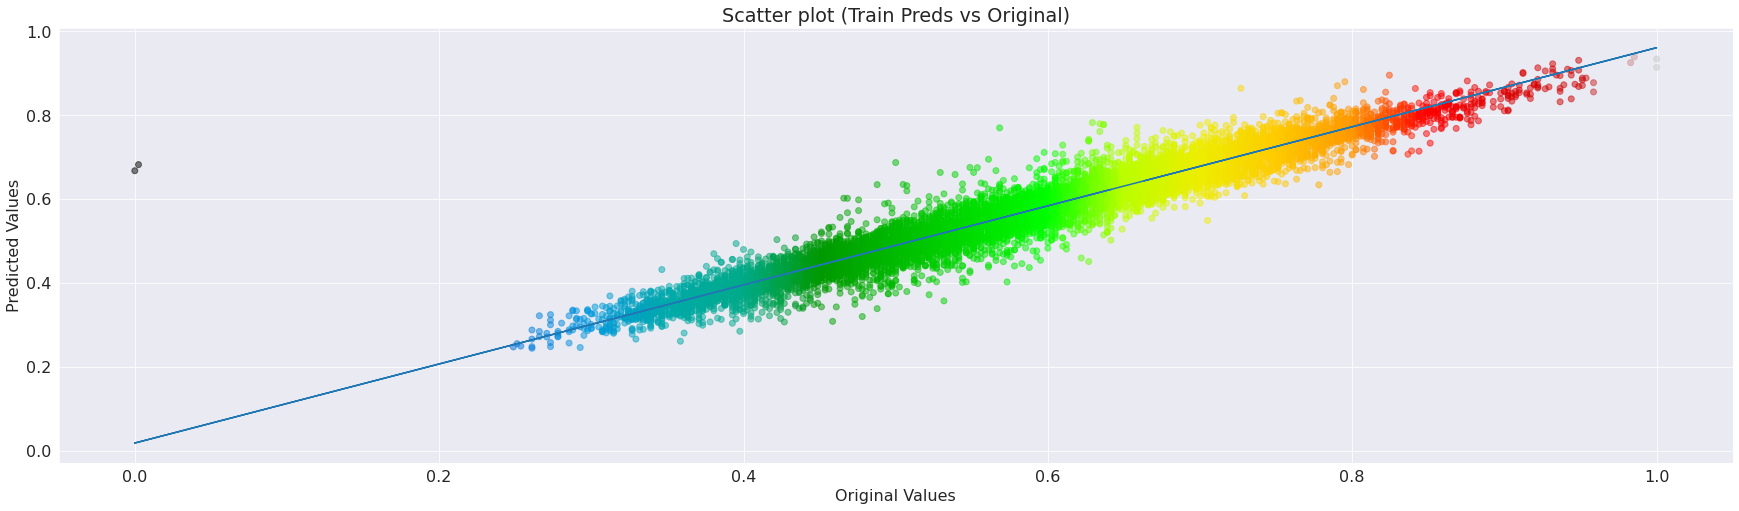

In [ ]:
plt.title('Scatter plot (Train Preds vs Original)')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.scatter(y_train, train_preds, alpha=0.5,c=y_train,cmap='nipy_spectral')
m, b = np.polyfit(y_train, train_preds, 1)
plt.plot(y_train, m*y_train+b)
plt.show()

The network can be evaluated on the training data, but this will not provide a useful indication of the performance of the network as a predictive model, as it has seen all of this data before.  
We can evaluate the performance of the network on a separate dataset, unseen during testing. This will provide an estimate of the performance of the network at making predictions for unseen data in the future.

###5. Making Predictions

**Preprocessing the Test Dataset**

- We collect last 30 days data from train dataset

In [ ]:
last_7_days = data[:int(data.shape[0]*0.8)].tail(7).copy()

In [ ]:
test.head()

,air_temp,windspeed,winddir,pressure,humidity,rainfall
Date,,,,,,
2019-03-05 12:00:00,27.0,0.0,359.2,1005.1,68.9,1
2019-03-05 14:00:00,25.2,0.7,115.8,1006.6,80.2,1
2019-03-05 15:00:00,25.3,0.0,359.2,1007.5,79.9,1
2019-03-05 16:00:00,24.9,0.7,358.7,1007.9,84.2,1
2019-03-05 17:00:00,24.5,0.0,359.2,1007.8,94.4,1


In [ ]:
test.shape

(3082, 6)

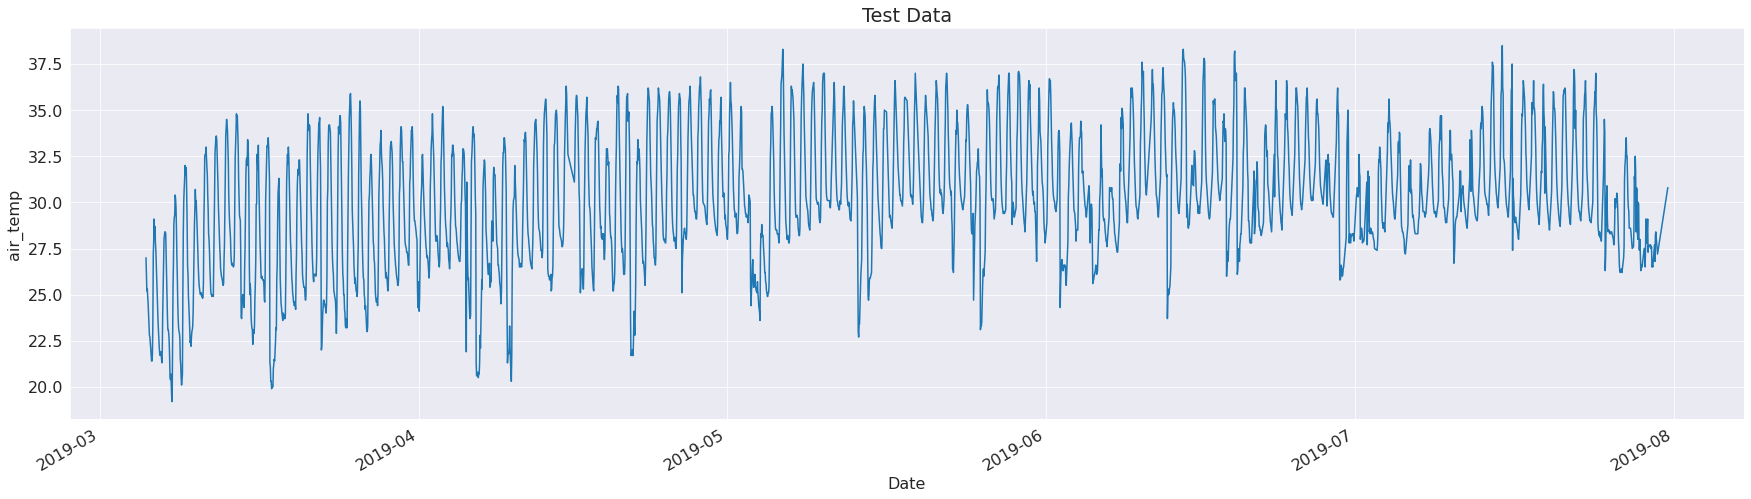

In [ ]:
plt.title('Test Data')
plt.xlabel("Year")
plt.ylabel('air_temp')
test['air_temp'].plot()

In [ ]:
#Adding last 30 days of train data and test data.
test_final = last_7_days.append(test, ignore_index=True)
test_final.head(10)

,air_temp,windspeed,winddir,pressure,humidity,rainfall
0,26.5,1.1,248.3,1007.4,98.5,1
1,28.3,0.4,202.3,1006.7,78.7,1
2,27.9,1.8,240.0,1005.9,77.5,1
3,28.2,0.8,174.0,1005.3,71.4,1
4,28.0,1.5,92.4,1004.8,69.7,1
5,28.1,1.8,209.2,1004.2,67.7,1
6,27.6,0.8,176.4,1004.6,64.4,1
7,27.0,0.0,359.2,1005.1,68.9,1
8,25.2,0.7,115.8,1006.6,80.2,1
9,25.3,0.0,359.2,1007.5,79.9,1


In [ ]:
#Scaling columns in the final test data.
test_final = scaler.transform(test_final)
test_final

array([[0.61463415, 0.12222222, 0.67808418, 0.55710306, 0.98494624,
        0.        ],
       [0.65853659, 0.04444444, 0.54455733, 0.53760446, 0.77204301,
        0.        ],
       [0.64878049, 0.2       , 0.65399129, 0.51532033, 0.75913978,
        0.        ],
       ...,
       [0.66097561, 0.        , 1.        , 0.40947075, 1.        ,
        0.        ],
       [0.63170732, 0.07777778, 0.58287373, 0.35654596, 0.97419355,
        0.        ],
       [0.7195122 , 0.14444444, 0.65689405, 0.29247911, 0.71505376,
        0.        ]])

In [ ]:
#Creating two empty lists X_test and y_test
X_test = []
y_test = []

- As we collect 30 days past data for every target value in the train dataset, similarly for all values in test data  it will take past 30 days values for each target value.

In [ ]:
for i in range(7, test_final.shape[0]):
  X_test.append(test_final[i-7:i])
  y_test.append(test_final[i,0])

In [ ]:
# converting into array.
X_test , y_test = np.array(X_test) , np.array(y_test)

In [ ]:
X_test.shape , y_test.shape

((3082, 7, 6), (3082,))

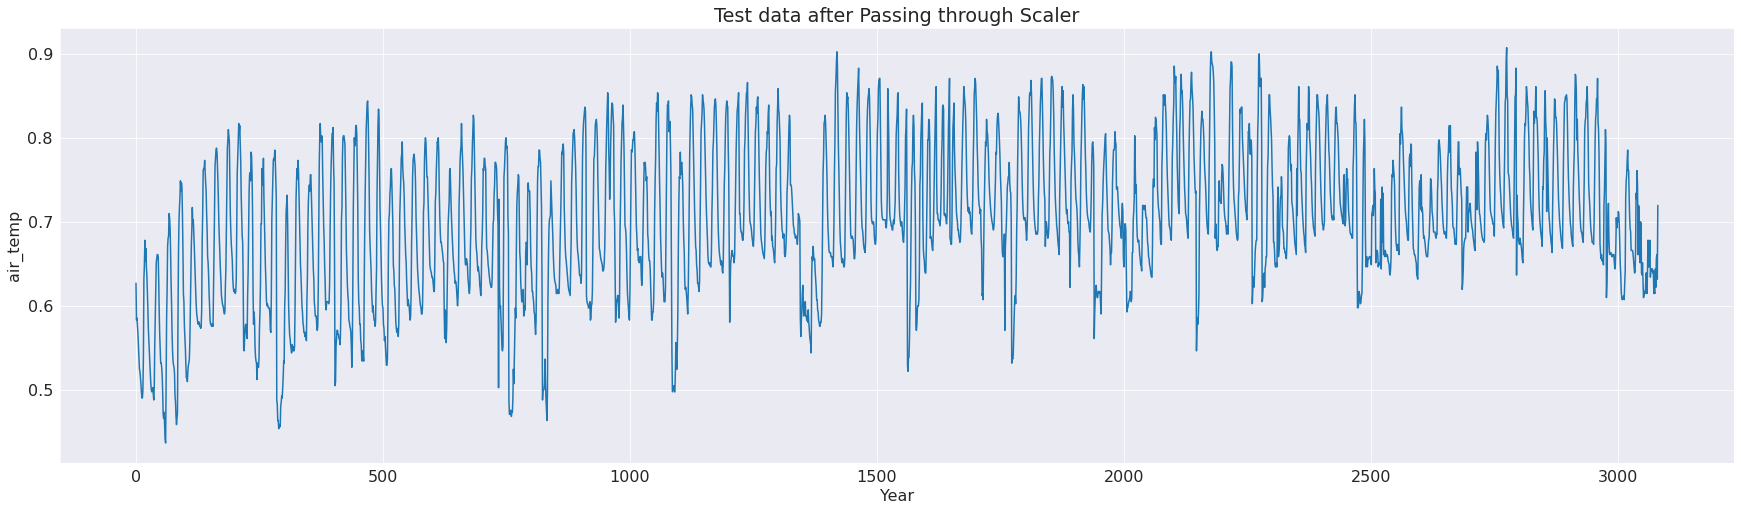

In [ ]:
plt.title('Test data after Passing through Scaler')
plt.xlabel('Year')
plt.ylabel('air_temp')
plt.plot(y_test)

***`Predicting on test data`***





In [ ]:
y_preds = model.predict(X_test)

In [ ]:
scaler.scale_

array([0.02439024, 0.11111111, 0.00290276, 0.02785515, 0.01075269,
       0.01282051])

In [ ]:
scale = 1/scaler.scale_[0]

In [ ]:
y_test = y_test*scale
y_preds = y_preds*scale

In [ ]:
print('1st predicted value: ',round(float(y_preds[1]),2))
print('1st original value: ', round(y_test[1],2))

1st predicted value:  27.14
1st original value:  23.9


In [ ]:
print('predicted value: ',round(float(y_preds[150]),2))
print('original value: ', round(y_test[150],2))

predicted value:  23.5
original value:  23.9


###Visualizing the result

In [ ]:
# for finding the rmse formodel.compile(optimizer='adamax', loss='mse',  metrics=['mse','mae', 'mape'])
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
print(round(rmse,2))

1.96


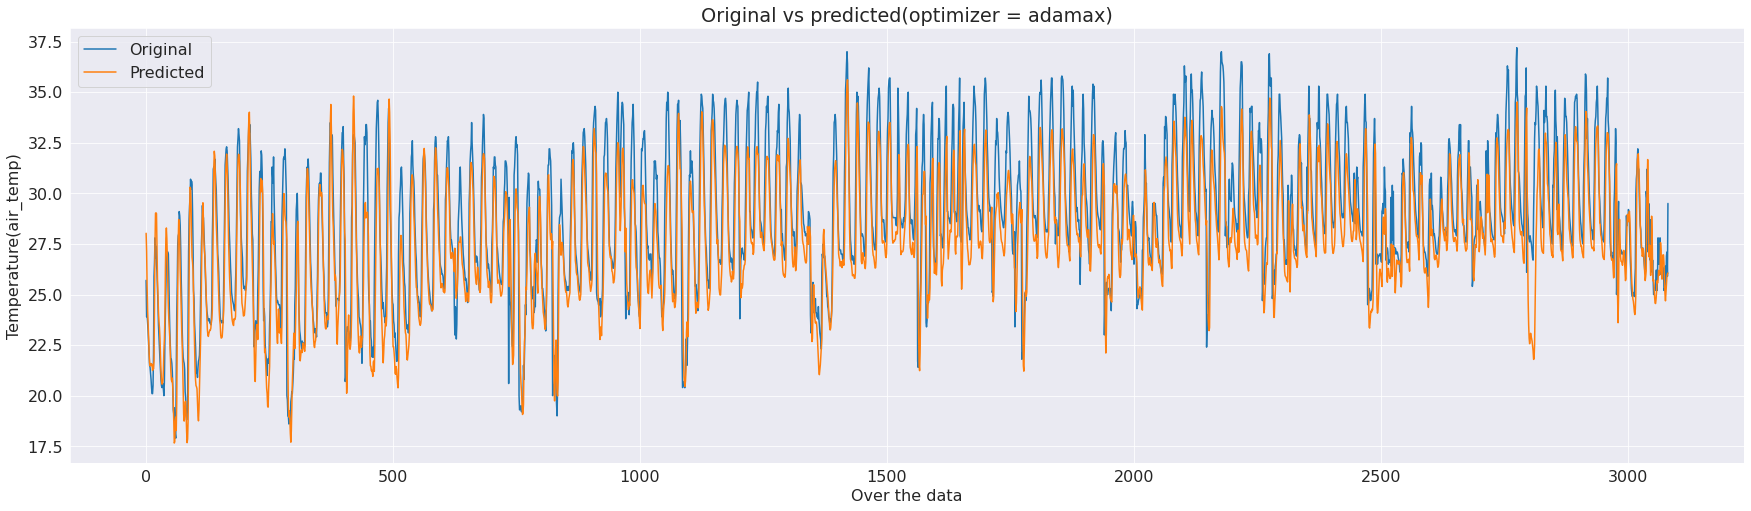

In [ ]:
# plotting the original Vs Predicted values graphically.
plt.figure(figsize=(30,8))
plt.title('Original vs predicted(optimizer = adamax)')
plt.xlabel('Over the data')
plt.ylabel('Temperature(air_temp)')
plt.plot(y_test)
plt.plot(y_preds)
plt.legend(['Original','Predicted'])
plt.show()

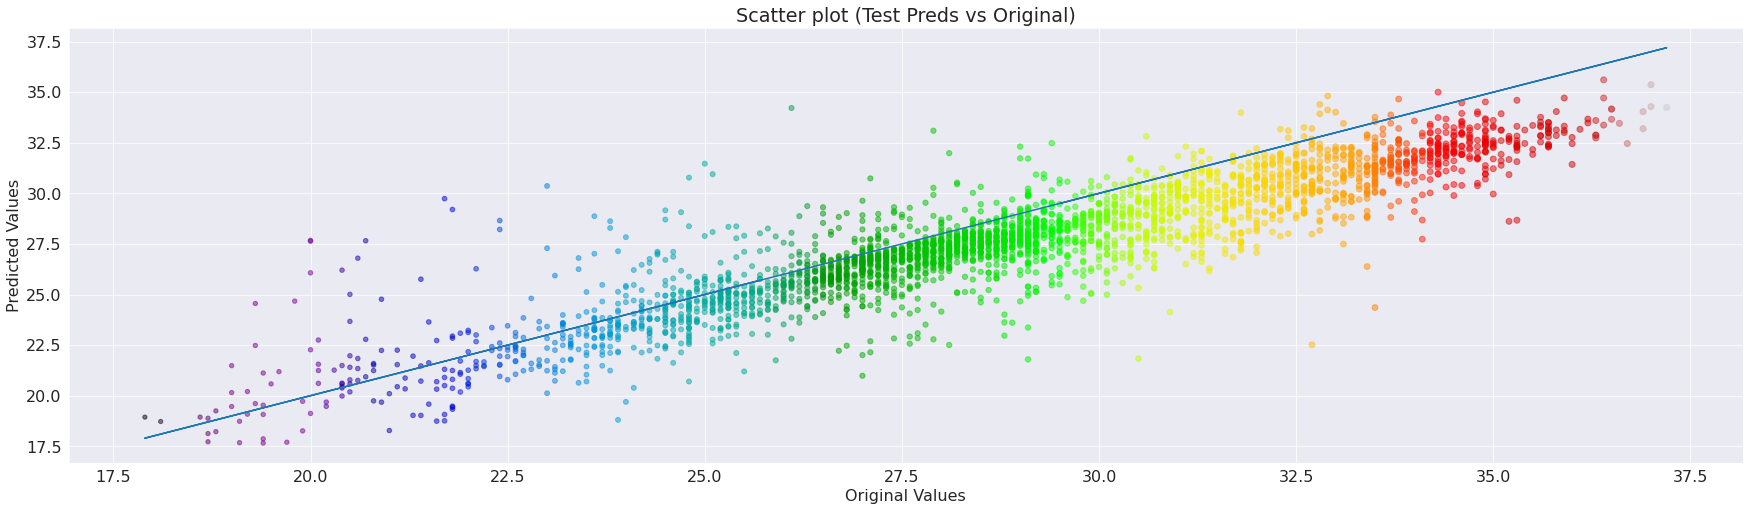

In [ ]:
plt.title('Scatter plot (Test Preds vs Original)')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.scatter(y_test, y_preds, alpha=0.5,c=y_test,cmap='nipy_spectral',s=y_test)
m = 1
plt.plot(y_test, m*y_test)
plt.show()